In [5]:
import optimiserBank as opt
import functionBank as func
import matplotlib.pyplot as plt
import importlib
importlib.reload(opt)
importlib.reload(func)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc 
from itertools import product
from pymoo.problems import get_problem


In [6]:
dtlz1 = get_problem("dtlz1", n_var=4, n_obj=2)

test = np.full((1,4),0.6)
result = dtlz1.evaluate(test)

result = np.append(result, [0])

lower = dtlz1.xl
upper = dtlz1.xu

bounds = []

for i in range(4):
    bounds.append([lower[i], upper[i]])

print(bounds)
print(dtlz1.xl)


print(result, result.shape)

[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]
[0. 0. 0. 0.]
[1.2 0.8 0. ] (3,)


In [3]:
dtlzProblems = ['dtlz1','dtlz2','dtlz3','dtlz4','dtlz5','dtlz6','dtlz7',]
from pymoo.problems import get_problem
from pymoo.util.plotting import plot
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter

ref_dirs = get_reference_directions("das-dennis", 2, n_partitions=100)

pareto = get_problem("dtlz1").pareto_front(ref_dirs)

print(pf)
# Scatter(angle=(45,45)).add(pf).show()

[[0.    0.5  ]
 [0.005 0.495]
 [0.01  0.49 ]
 [0.015 0.485]
 [0.02  0.48 ]
 [0.025 0.475]
 [0.03  0.47 ]
 [0.035 0.465]
 [0.04  0.46 ]
 [0.045 0.455]
 [0.05  0.45 ]
 [0.055 0.445]
 [0.06  0.44 ]
 [0.065 0.435]
 [0.07  0.43 ]
 [0.075 0.425]
 [0.08  0.42 ]
 [0.085 0.415]
 [0.09  0.41 ]
 [0.095 0.405]
 [0.1   0.4  ]
 [0.105 0.395]
 [0.11  0.39 ]
 [0.115 0.385]
 [0.12  0.38 ]
 [0.125 0.375]
 [0.13  0.37 ]
 [0.135 0.365]
 [0.14  0.36 ]
 [0.145 0.355]
 [0.15  0.35 ]
 [0.155 0.345]
 [0.16  0.34 ]
 [0.165 0.335]
 [0.17  0.33 ]
 [0.175 0.325]
 [0.18  0.32 ]
 [0.185 0.315]
 [0.19  0.31 ]
 [0.195 0.305]
 [0.2   0.3  ]
 [0.205 0.295]
 [0.21  0.29 ]
 [0.215 0.285]
 [0.22  0.28 ]
 [0.225 0.275]
 [0.23  0.27 ]
 [0.235 0.265]
 [0.24  0.26 ]
 [0.245 0.255]
 [0.25  0.25 ]
 [0.255 0.245]
 [0.26  0.24 ]
 [0.265 0.235]
 [0.27  0.23 ]
 [0.275 0.225]
 [0.28  0.22 ]
 [0.285 0.215]
 [0.29  0.21 ]
 [0.295 0.205]
 [0.3   0.2  ]
 [0.305 0.195]
 [0.31  0.19 ]
 [0.315 0.185]
 [0.32  0.18 ]
 [0.325 0.175]
 [0.33  0.

In [26]:
problem, bounds = func.getPyMooProblem('dtlz1', 4, 2)

# sample = .array((7.945126785134599690e-01, 1.117080453219960745e-01, 3.647062041950427380e-02, 1.404519350338756800e-01))
# sample = np.loadtxt('dtlzRunI/BOFeaturesdtlz1HypI.txt')[:20]
sample = np.full((1,4),0)
print(sample.shape)
print(bounds)
print(problem)
result = func.evalPyMooProblem(problem, sample)

print(result)

(1, 4)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
# name: DTLZ1
# n_var: 4
# n_obj: 2
# n_ieq_constr: 0
# n_eq_constr: 0

[[ 0. 38.]]


AttributeError: 'function' object has no attribute 'type'

In [ ]:
weights = np.array((0.25, 1, 0.25, 0.5))
functionDict = {
                # func.binhAndKorn:[(0,5), (0,3)]
                # func.chankongHaimes:[(-20,20), (-20,20)]
                # func.fonsecaFleming:[(-4,4), (-4,4)] 
                # func.ctp1:[(0,1), (0,1)], 
                # func.constrEx:[(0.1,1), (0,5)]
                # func.testFunction4:[(-7,4), (-7,4)]
                func.viennetFunction:[(-3,3), (-3,3)]
                }

In [ ]:
for key, value in functionDict.items():

    functionOutput = np.zeros((0,4))

    print(value)
    print(value.shape)

    x_range = np.linspace(value[0][0], value[0][1], 75)
    y_range = np.linspace(value[1][0], value[1][1], 75)
    fullRange = list(product(x_range, y_range))
    fullRangeArray = np.array(fullRange)
    for i in range(0, len(fullRangeArray)):
        # print(fullRangeArray[i])
        functionOutput = np.vstack((functionOutput, opt.MOobjective_function(fullRangeArray[i], key, 4)))

pareto = func.computeParetoShells(functionOutput)[0]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# ax.scatter(functionOutput[:,0], functionOutput[:,1], functionOutput[:,2])
ax.scatter(pareto[:,1], pareto[:,0], pareto[:,2])
ax.invert_yaxis()
ax.view_init(azim=160)

plt.show()

[(-3, 3), (-3, 3)]


AttributeError: 'list' object has no attribute 'shape'

In [ ]:


for key, value in functionDict.items():
    print(key.__name__, value)

    initSampleSize = 20
    bounds = np.array(value)
    lowBounds = bounds[:, 0]
    highBounds = bounds[:, 1]

    # Generate one Latin Hypercube Sample (LHS) for each test function,
    # to be used for all optimisers/scalarisers using a population size of 20
    sampler = qmc.LatinHypercube(
        d=bounds.shape[0]
    )  # Dimension is determined from bounds
    sample = sampler.random(n=initSampleSize)
    initPopulation = qmc.scale(sample, lowBounds, highBounds)

    # Check for and systematically replace NaN values in initial population
    # Requires evaluating initial population
    initialObjvTargets = np.empty((0, len(bounds)+2))

    # objvTargets = opt.MOobjective_function(initPopulation, key, bounds.shape[0])

    for i in range(initSampleSize):
        # print(i)
        # candidate = initPopulation[i]
        newObjvTgt = opt.MOobjective_function(initPopulation[i], key, (bounds.shape[0]+2))

        # # Replace NaN values in the objective function result with valid samples
        # while np.any(np.isnan(newObjvTgt)):
        #     candidate = np.random.uniform(
        #         lowBounds, highBounds
        #     )  # Match dimension automatically
        #     newObjvTgt = opt.MOobjective_function(candidate, key, bounds.shape[0])
        #     initPopulation[i] = candidate
        initialObjvTargets = np.vstack((initialObjvTargets, newObjvTgt))

    print("Initial Population:")
    print(initPopulation)
    print("initial targets:\n", initialObjvTargets )
    print(len(bounds)+1)

    # bayesianRun = opt.BOZeroMax(value, 15, key, func.augmentedChebychev, len(bounds)+1, weights, useInitialPopulation=True, initialPopulation=initPopulation, initialObjvValues=initialObjvTargets, maxFE=100)
    # bayesianRun.runOptimiser()

    # bayesianRun = opt.bayesianOptimiser(value, 15, key, func.augmentedChebychev, len(bounds)+1, weights, useInitialPopulation=True, initialPopulation=initPopulation, initialObjvValues=initialObjvTargets, maxFE=100)
    # bayesianRun.runOptimiser()    # ESA = opt.ESA(value, 20, 10, 0.25, key, func.weightedNorm, 2, weights, 0.9, 80, useInitialPopulation=True, initialPopulation=initPopulation)
    # # # ESA.mainMenu(initialAction=2)

    PSO = opt.TS_DDEO(
        value,
        20,
        key,
        func.augmentedChebychev,
        4,
        weights,
        useInitialPopulation=True,
        initialPopulation=initPopulation,
        initialObjvValues=initialObjvTargets
    )
    PSO.stage1()
    PSO.stage2()

viennetFunction [(-3, 3), (-3, 3)]
Initial Population:
[[-1.7971175  -0.40574772]
 [ 2.90293289  1.90975336]
 [ 2.46322247  2.9169801 ]
 [-0.75214751 -2.92791693]
 [-0.30576796  0.83647331]
 [-2.32541484 -1.41278109]
 [-2.52287235  0.48948628]
 [ 0.25777906  2.49356901]
 [ 0.89112305 -0.11467358]
 [-1.49943025 -1.96846567]
 [ 1.07366884 -0.66612135]
 [ 1.22762818  2.20407982]
 [-1.08793341  1.7433516 ]
 [-0.2433879  -1.79035665]
 [ 0.55019912  0.23780892]
 [-2.93377424 -1.12238454]
 [ 1.67903303 -2.68126932]
 [ 2.22026364 -2.27162957]
 [-1.96454452  1.48433848]
 [ 1.92168938  1.06889973]]
initial targets:
 [[ 1.44714132e+00  1.50477023e+01  1.90647643e-01  0.00000000e+00]
 [ 5.56452862e+00  2.50245784e+01  7.64803730e-02  0.00000000e+00]
 [ 8.19326594e+00  1.88692865e+01  6.41998408e-02  0.00000000e+00]
 [ 4.85166879e+00  2.25923810e+01  9.85164628e-02  0.00000000e+00]
 [ 1.10917988e+00  1.52491736e+01  6.00245598e-02  0.00000000e+00]
 [ 4.60199177e+00  1.50031208e+01  1.18327946e-01  

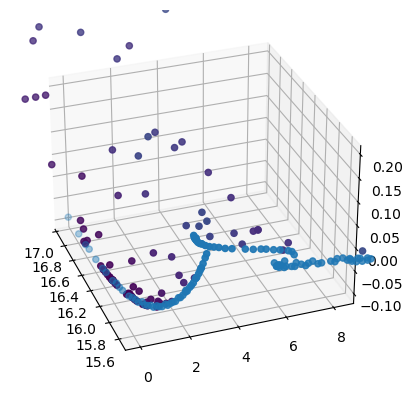

In [ ]:
tsF = np.loadtxt('TSDDEOFeatures.txt')
tsO = np.loadtxt('TSDDEOObjectiveTargets.txt')
tsS = np.loadtxt('TSDDEOTargets.txt')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(tsO[:,1], tsO[:,0], tsO[:,2], c=tsS)
ax.scatter(pareto[:,1], pareto[:,0], pareto[:,2])
ax.set_xlim(15.5, 17)
ax.invert_yaxis()
ax.view_init(azim=160)
plt.show()

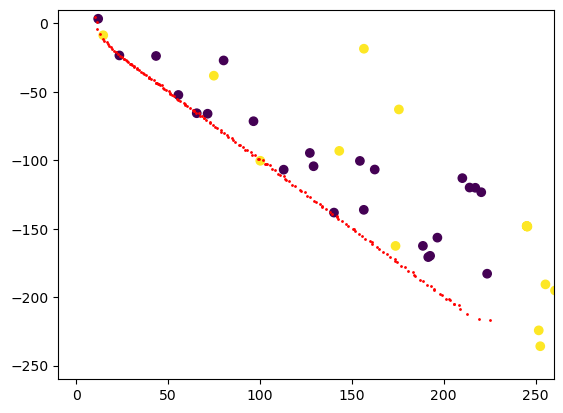

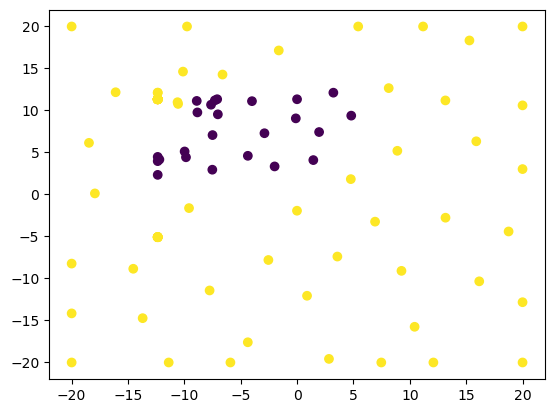

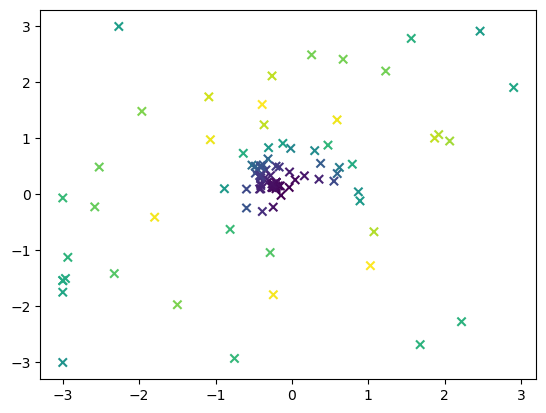

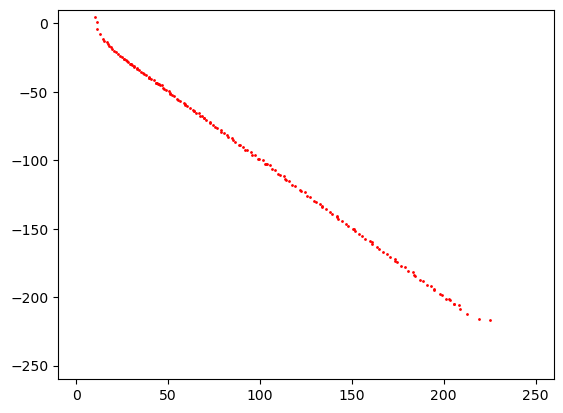

In [ ]:
minmax = np.loadtxt('BOMinMaxObjectiveTargets.txt')
max = np.loadtxt('BOObjectiveTargets.txt')
mmObjv3 = np.loadtxt('BOMinMaxObjectiveTargets.txt')[:,2]
mObjv3 = np.loadtxt('BOObjectiveTargets.txt')[:,2]

tsF = np.loadtxt('TSDDEOFeatures.txt')
tsO = np.loadtxt('TSDDEOObjectiveTargets.txt')
tsS = np.loadtxt('TSDDEOTargets.txt')

paretoFront = np.loadtxt('paretoFronts/chankongHaimesPareto.txt')

# plt.scatter(max[:,0], max[:,1], alpha = 1, marker='x', c = mObjv3)
plt.scatter(minmax[:,0], minmax[:,1], alpha = 1, c = mmObjv3)
plt.scatter(paretoFront[:,0], paretoFront[:,1], c='red', s=1)

plt.xlim(-10, 260)
plt.ylim(-260,10)
plt.show()


# [(-10,260), (-260,10)]

mmFeatures = np.loadtxt('BOMinMaxFeatures.txt')
# mmObjv3 = np.loadtxt('BOMinMaxObjectiveTargets.txt')[:,2]
mFeatures = np.loadtxt('BOFeatures.txt')

# plt.scatter(mFeatures[:,0], mFeatures[:,1], alpha = 1, marker='x' ,c = mObjv3)
plt.scatter(mmFeatures[:,0], mmFeatures[:,1], alpha = 1, c = mmObjv3)

plt.show()
plt.scatter(tsF[:,0], tsF[:,1], alpha = 1, marker='x' ,c = tsO[:,2])
plt.show()

plt.scatter(tsO[:,0], tsO[:,1], alpha = 1, marker='x' ,c = tsO[:,2])
plt.scatter(paretoFront[:,0], paretoFront[:,1], c='red', s=1)
plt.xlim(-10, 260)
plt.ylim(-260,10)
plt.show()


In [ ]:
test = np.empty((50,2))
print(test)

print(len(test[4]))

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
2


In [ ]:
import numpy as np

# Example array with shape (50, n)
# Replace this with your actual array
data = np.random.rand(50, 5)  # Adjust number of columns as needed
data[:, -1] = np.random.choice([0, 1], size=50)  # Setting the last column to 0s and 1s

# Filter the rows where the last column is 0
valid_rows = data[data[:, -1] == 0]

# Find the maximum values in all columns except the last among valid rows
max_values = np.max(valid_rows[:, :-1], axis=0)

print("Maximum values in each column (excluding the last, valid rows):", max_values)

Maximum values in each column (excluding the last, valid rows): [0.99235027 0.96901859 0.98507053 0.96605214]
